In [1]:
import numpy as np
import pandas as pd
import pulp as plp
import matplotlib.pyplot as plt

In [2]:
# !pip install pulp

In [3]:

def node(size = 6,position = "Random"):
    if position == "Random":
    np.random.seed(3)
    x = np.random.uniform(0,5,n)
    y = np.random.uniform(0,5,n)
    
    
        
    

IndentationError: expected an indented block (<ipython-input-3-15a85610a928>, line 3)

In [65]:
n = 8
np.random.seed(3)
x = np.random.uniform(0,5,n)
y = np.random.uniform(0,5,n)
x[0] = -0.1
y[0] = 1.5
x[-1] = 5
y[-1] = 1.5
xn = x.copy(); yn = y.copy();
xn[1] = 5;
yn[1] = 0;
xn[5] = 5;
yn[5] = 5;


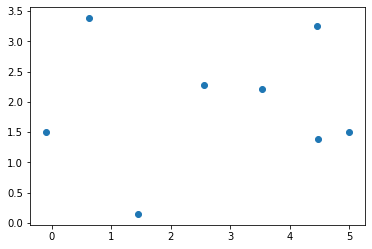

In [66]:
plt.scatter(x,y);

In [67]:
d = np.zeros(shape = (n,n));dn = d.copy()

In [68]:
for i in range(n):
    for j in range(n):
        d[i,j] = np.sqrt((x[i]-x[j])**2 + (y[i]-y[j])**2)
        dn[i,j] = np.sqrt((xn[i]-xn[j])**2 + (yn[i]-yn[j])**2)
d

array([[0.        , 3.70818913, 2.05929975, 2.76755581, 4.887161  ,
        4.58272796, 2.01719381, 5.1       ],
       [3.70818913, 0.        , 2.92813183, 0.98984869, 1.39242468,
        1.24244975, 3.14170915, 1.62022456],
       [2.05929975, 2.92813183, 0.        , 2.40134524, 4.31841256,
        3.27224128, 3.33592538, 3.79401816],
       [2.76755581, 0.98984869, 2.40134524, 0.        , 2.13891707,
        2.12362258, 2.21674028, 2.5684932 ],
       [4.887161  , 1.39242468, 4.31841256, 2.13891707, 0.        ,
        1.85335934, 3.83920204, 1.82593757],
       [4.58272796, 1.24244975, 3.27224128, 2.12362258, 1.85335934,
        0.        , 4.33650077, 0.52957342],
       [2.01719381, 3.14170915, 3.33592538, 2.21674028, 3.83920204,
        4.33650077, 0.        , 4.75964495],
       [5.1       , 1.62022456, 3.79401816, 2.5684932 , 1.82593757,
        0.52957342, 4.75964495, 0.        ]])

In [69]:
t = 2.5
A = d < t
An = dn < t

In [70]:
A

array([[ True, False,  True, False, False, False,  True, False],
       [False,  True, False,  True,  True,  True, False,  True],
       [ True, False,  True,  True, False, False, False, False],
       [False,  True,  True,  True,  True,  True,  True, False],
       [False,  True, False,  True,  True,  True, False,  True],
       [False,  True, False,  True,  True,  True, False,  True],
       [ True, False, False,  True, False, False,  True, False],
       [False,  True, False, False,  True,  True, False,  True]])

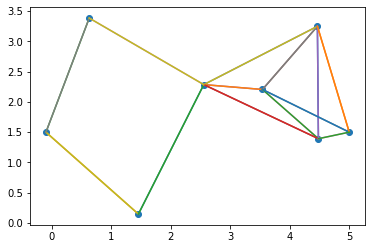

In [71]:
plt.scatter(x,y);
for i in range(n):
    for j in range(n):
        if A[i,j]:
            plt.plot([x[i],x[j]], [y[i],y[j]])

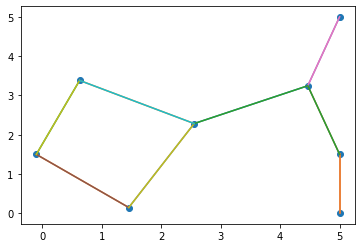

In [72]:
plt.scatter(xn,yn);
for i in range(n):
    for j in range(n):
        if An[i,j]:
            plt.plot([xn[i],xn[j]], [yn[i],yn[j]])

In [139]:
m = 4 # number of apps
P = np.array([[0,1,0,0],
              [0,0,1,0],
              [0,0,0,1],
              [0,0,0,0]])
Dmd = np.random.uniform(low=20, high=22, size=m); Dmd[0]=0; Dmd[-1]=0;print(Dmd)

Cap = np.random.uniform(low=20, high=22, size=n); Cap[0]=0; Cap[-1]=0;print(Cap); #Cap[7] = 1;

[ 0.         20.8902901  20.12305786  0.        ]
[ 0.         20.46116841 21.38295502 21.30095372 21.44787828 20.95017722
 21.19332755  0.        ]


In [140]:

#variables

x_vars  =  {"x_{0}_{1}".format(i,j): plp.LpVariable(cat = plp.LpBinary, name="x_{0}_{1}".format(i,j)) for i in range(n) for j in range(n)}
y_vars  =  {"y_{0}_{1}".format(i,a): plp.LpVariable(cat = plp.LpBinary, name="y_{0}_{1}".format(i,a)) for i in range(n) for a in range(m)}
w_vars  =  {"w_{0}".format(i): plp.LpVariable(cat = plp.LpBinary, name="w_{0}".format(i)) for i in range(n)}
e_vars  =  {"e_{0}".format(i): plp.LpVariable(cat = plp.LpBinary, name="e_{0}".format(i)) for i in range(1,n-1)}
t_vars  =  {"t_{0}_{1}_{2}".format(i,j,a): plp.LpVariable(cat = plp.LpBinary, name="t_{0}_{1}_{2}".format(i,j,a)) for i in range(n) for j in range(n) for a in range(m)}

#new variables for moved node
xn_vars  =  {"x_{0}_{1}".format(i,j): plp.LpVariable(cat = plp.LpBinary, name="x_{0}_{1}".format(i,j)) for i in range(n) for j in range(n)}
yn_vars  =  {"y_{0}_{1}".format(i,a): plp.LpVariable(cat = plp.LpBinary, name="y_{0}_{1}".format(i,a)) for i in range(n) for a in range(m)}
wn_vars  =  {"w_{0}".format(i): plp.LpVariable(cat = plp.LpBinary, name="w_{0}".format(i)) for i in range(n)}
en_vars  =  {"e_{0}".format(i): plp.LpVariable(cat = plp.LpBinary, name="e_{0}".format(i)) for i in range(1,n-1)}
tn_vars  =  {"t_{0}_{1}_{2}".format(i,j,a): plp.LpVariable(cat = plp.LpBinary, name="t_{0}_{1}_{2}".format(i,j,a)) for i in range(n) for j in range(n) for a in range(m)}

def createModel(x_vars, y_vars, w_vars, e_vars, t_vars, A):
    opt_model_simple = plp.LpProblem(name="MILP_Model")
    M = 100000


# 1
    con = [opt_model_simple.addConstraint(plp.LpConstraint(
                e = plp.lpSum(x_vars["x_{0}_{1}".format(0,j)] for j in range(n)), 
                sense = plp.LpConstraintGE,
                rhs = 1,
                name="source0"))]

    con = [opt_model_simple.addConstraint(plp.LpConstraint(
                e = y_vars["y_{0}_{1}".format(0,0)], 
                sense = plp.LpConstraintEQ,
                rhs = 1,
                name="source1"))]

# 2
    con = [opt_model_simple.addConstraint(plp.LpConstraint(
                e = plp.lpSum(x_vars["x_{0}_{1}".format(j,n-1)] for j in range(n)), 
                sense = plp.LpConstraintGE,
                rhs = 1,
                name="sink0"))]

    con = [opt_model_simple.addConstraint(plp.LpConstraint(
                e = y_vars["y_{0}_{1}".format(n-1,m-1)], 
                sense = plp.LpConstraintGE,
                rhs = 1,
                name="sink1"))]

    con = {"loop_{0}_{1}".format(i,j) : opt_model_simple.addConstraint(plp.LpConstraint(
                e = x_vars["x_{0}_{1}".format(i,j)] + x_vars["x_{0}_{1}".format(j,i)] , 
                sense = plp.LpConstraintLE,
                rhs = 1,
                name="loop_{0}_{1}".format(i,j))) for i in range(n) for j in range(n)}


    con = {"entry1_{0}".format(i) : opt_model_simple.addConstraint(plp.LpConstraint(
                e = plp.lpSum(x_vars["x_{0}_{1}".format(j,i)] for j in range(n)) - e_vars["e_{0}".format(i)], 
                sense = plp.LpConstraintEQ,
                rhs = 0,
                name="entry1_{0}".format(i))) for i in range(1,n-1)}



    con = {"output1_{0}".format(i) : opt_model_simple.addConstraint(plp.LpConstraint(
                e = plp.lpSum(x_vars["x_{0}_{1}".format(i,j)] for j in range(n)) - e_vars["e_{0}".format(i)],  
                sense = plp.LpConstraintEQ,
                rhs = 0,
                name="output1_{0}".format(i))) for i in range(1,n-1)}

















    con = [opt_model_simple.addConstraint(plp.LpConstraint(
                e = plp.lpSum(Dmd[a]*y_vars["y_{0}_{1}".format(i,a)] for a in range(m)),  
                sense = plp.LpConstraintLE,
                rhs = Cap[i],
                name="demand_{0}".format(i))) for i in range(n)]


    con = [opt_model_simple.addConstraint(plp.LpConstraint(
                e = x_vars["x_{0}_{1}".format(i,j)], 
                sense = plp.LpConstraintLE,
                rhs = 0,
                name="isConn_{0}_{1}".format(i,j))) for i in range(n) for j in range(n) if (i == j) or (not A[i,j]) ]

    con = [opt_model_simple.addConstraint(plp.LpConstraint(
                e = plp.lpSum(y_vars["y_{0}_{1}".format(i,a)] for a in range(m)) - e_vars["e_{0}".format(i)], 
                sense = plp.LpConstraintLE,
                rhs = 0,
                name="aloc1_{0}".format(i))) for i in range(1,n-1)]

    con = [opt_model_simple.addConstraint(plp.LpConstraint(
                e = plp.lpSum(y_vars["y_{0}_{1}".format(i,a)] for i in range(n)), 
                sense = plp.LpConstraintEQ,
                rhs = 1,
                name="aloc2_{0}".format(a))) for a in range(m)]
    



    con = [opt_model_simple.addConstraint(plp.LpConstraint(
                e = w_vars["w_{0}".format(i)] - plp.lpSum(y_vars["y_{0}_{1}".format(i,a)] for a in range(m)), 
                sense = plp.LpConstraintEQ,
                rhs = 0,
                name="w_{0}".format(i))) for i in range(n)]
    
    con = [opt_model_simple.addConstraint(plp.LpConstraint(
                e = plp.lpSum(t_vars["t_{0}_{1}_{2}".format(i,j,a)] for a in range(m)) - x_vars["x_{0}_{1}".format(i,j)], 
                sense = plp.LpConstraintEQ,
                rhs = 0,
                name="t1_{0}_{1}".format(i,j))) for i in range(n) for j in range(n)]
    
    
    con = [opt_model_simple.addConstraint(plp.LpConstraint(
                e = t_vars["t_{0}_{1}_{2}".format(i,j,a)] - M*(2 - y_vars["y_{0}_{1}".format(i,a)] - x_vars["x_{0}_{1}".format(i,j)]),
                sense = plp.LpConstraintLE,
                rhs = 1,
                name="t2_{0}_{1}_{2}".format(i,j,a))) for i in range(n) for j in range(n) for a in range(m)]
    
    con = [opt_model_simple.addConstraint(plp.LpConstraint(
                e = t_vars["t_{0}_{1}_{2}".format(i,j,a)] + M*(2 - y_vars["y_{0}_{1}".format(i,a)] - x_vars["x_{0}_{1}".format(i,j)]),
                sense = plp.LpConstraintGE,
                rhs = 1,
                name="t3_{0}_{1}_{2}".format(i,j,a))) for i in range(n) for j in range(n) for a in range(m)]
    
    con = [opt_model_simple.addConstraint(plp.LpConstraint(
                e = t_vars["t_{0}_{1}_{2}".format(i,j,a)] - plp.lpSum(t_vars["t_{0}_{1}_{2}".format(k,i,a)] for k in range(n)) - M*(1 + w_vars["w_{0}".format(i)] - x_vars["x_{0}_{1}".format(i,j)]),
                sense = plp.LpConstraintLE,
                rhs = 0,
                name="t4_{0}_{1}_{2}".format(i,j,a))) for i in range(n) for j in range(n) for a in range(m)]
    
    
    con = [opt_model_simple.addConstraint(plp.LpConstraint(
                e = t_vars["t_{0}_{1}_{2}".format(i,j,a)] - plp.lpSum(t_vars["t_{0}_{1}_{2}".format(k,i,a)] for k in range(n)) + M*(1 + w_vars["w_{0}".format(i)] - x_vars["x_{0}_{1}".format(i,j)]),
                sense = plp.LpConstraintGE,
                rhs = 0,
                name="t5_{0}_{1}_{2}".format(i,j,a))) for i in range(n) for j in range(n) for a in range(m)]
    
    
    con = [opt_model_simple.addConstraint(plp.LpConstraint(
                e = t_vars["t_{0}_{1}_{2}".format(i,j,a)] - M*(3 - y_vars["y_{0}_{1}".format(j,b)] - x_vars["x_{0}_{1}".format(i,j)] - P[a,b]),
                sense = plp.LpConstraintLE,
                rhs = 1,
                name="t6_{0}_{1}_{2}_{3}".format(i,j,a,b))) for i in range(n) for j in range(n) for a in range(m) for b in range(m)]
    
    con = [opt_model_simple.addConstraint(plp.LpConstraint(
                e = t_vars["t_{0}_{1}_{2}".format(i,j,a)] + M*(3 - y_vars["y_{0}_{1}".format(j,b)] - x_vars["x_{0}_{1}".format(i,j)] - P[a,b]),
                sense = plp.LpConstraintGE,
                rhs = 1,
                name="t7_{0}_{1}_{2}_{3}".format(i,j,a,b))) for i in range(n) for j in range(n) for a in range(m) for b in range(m)]
    
    
    
    return opt_model_simple

opt_model_simple = createModel(x_vars, y_vars, w_vars, e_vars, t_vars, A)


objective = plp.lpSum((d[i,j]+10)*x_vars["x_{0}_{1}".format(i,j)] 
                      for i in range(n) 
                      for j in range(n))
# for minimization
opt_model_simple.sense = plp.LpMinimize
opt_model_simple.setObjective(objective)

# solving with local cplex
print(opt_model_simple.solve())

opt_model_simple.numConstraints()

#### X
x_df = pd.DataFrame.from_dict(x_vars, orient="index", 
                                columns = ["variable_object"])

x_df["solution_value"] = x_df["variable_object"].apply(lambda item: item.varValue)

##### E
e_df = pd.DataFrame.from_dict(e_vars, orient="index", 
                                columns = ["variable_object"])

e_df["solution_value"] = e_df["variable_object"].apply(lambda item: item.varValue)



#### Y
y_df = pd.DataFrame.from_dict(y_vars, orient="index", 
                                columns = ["variable_object"])

y_df["solution_value"] = y_df["variable_object"].apply(lambda item: item.varValue)


1


In [141]:
for k,v in t_vars.items():
    if v.varValue > 0.0:
        print(k)

t_0_6_0
t_1_7_2
t_3_1_2
t_6_3_1


In [142]:
ForwardPath = {}
BackwardPath = {}
for k,v in x_vars.items():
    if v.varValue > 0.0:
        print(k)
        i,j = list(map(int,k.split("_")[1:]))
        ForwardPath[i] = j
        BackwardPath[j] = i
print(f"forward path : {ForwardPath} \nbackward path : {BackwardPath}" )

x_0_6
x_1_7
x_3_1
x_6_3
forward path : {0: 6, 1: 7, 3: 1, 6: 3} 
backward path : {6: 0, 7: 1, 1: 3, 3: 6}


In [143]:
for k,v in y_vars.items():
    if v.varValue != None:
        if v.varValue > 0:
            print(k)
# print(y_df.sum())

y_0_0
y_3_2
y_6_1
y_7_3


In [144]:
for k,v in w_vars.items():
    if v.varValue != None:
        if v.varValue > 0 :
            print(k)

w_0
w_3
w_6
w_7


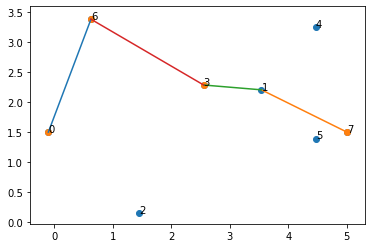

In [145]:
plt.scatter(x,y);
for i in range(n):
    plt.annotate(i, (x[i], y[i]))
    
for k,v in x_vars.items():
    if v.varValue > 0.5:
        i,j = list(map(int,k.split("_")[1:]))
        plt.plot([x[i],x[j]], [y[i],y[j]])
xx = []
yy = []
for k,v in y_vars.items():
    if v.varValue > 0.5:
        i,a = list(map(int,k.split("_")[1:]))
        xx.append(x[i])
        yy.append(y[i])
plt.scatter(xx,yy);

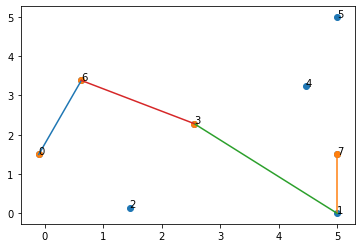

In [146]:
plt.scatter(xn,yn);
for i in range(n):
    plt.annotate(i, (xn[i], yn[i]))
    
for k,v in x_vars.items():
    if v.varValue > 0.5:
        i,j = list(map(int,k.split("_")[1:]))
        plt.plot([xn[i],xn[j]], [yn[i],yn[j]])
xx = []
yy = []
for k,v in y_vars.items():
    if v.varValue > 0.5:
        i,a = list(map(int,k.split("_")[1:]))
        xx.append(xn[i])
        yy.append(yn[i])
plt.scatter(xx,yy);

In [147]:
movedNode = 1
xFreezInd = []
yFreezInd = []
wFreezInd = []
eFreezInd = []
releaseNode = [movedNode]
start = movedNode
while w_vars["w_{0}".format(ForwardPath[start])].varValue != 1:
    releaseNode.append(ForwardPath[start])
    start = ForwardPath[start]
sink = ForwardPath[start]
start = movedNode
while w_vars["w_{0}".format(BackwardPath[start])].varValue != 1:
    releaseNode.append(BackwardPath[start])
    start = BackwardPath[start]
source = BackwardPath[start]

In [148]:
releaseNode, source, sink

([1], 3, 7)

In [149]:
for k,v in x_vars.items():
    if v.varValue > 0.0:
        i,j = list(map(int,k.split("_")[1:]))
        if not ((i in releaseNode) or (j in releaseNode)):
            xFreezInd.append((i,j))

In [150]:
xFreezInd

[(0, 6), (6, 3)]

In [151]:
for k,v in y_vars.items():
    if v.varValue > 0.0:
        i,a = list(map(int,k.split("_")[1:]))
        if not (i in releaseNode):
            yFreezInd.append((i,a))

In [152]:
yFreezInd

[(0, 0), (3, 2), (6, 1), (7, 3)]

In [153]:
for k,v in w_vars.items():
    if v.varValue > 0.0:
        i = list(map(int,k.split("_")[1:]))
        if not (i[0] in releaseNode):
            wFreezInd.append(i[0])

In [154]:
wFreezInd

[0, 3, 6, 7]

In [155]:
for k,v in e_vars.items():
    if v.varValue > 0.0:
        i = list(map(int,k.split("_")[1:]))
        if not (i[0] in releaseNode):
            eFreezInd.append(i[0])

In [156]:
eFreezInd

[3, 6]

In [157]:
opt_model = createModel(xn_vars, yn_vars, wn_vars, en_vars, tn_vars, An)



con = [opt_model.addConstraint(plp.LpConstraint(
            e = xn_vars["x_{0}_{1}".format(i,j)] , 
            sense = plp.LpConstraintEQ,
            rhs = 1,
            name="fixx_{0}_{1}".format(i,j))) for i,j in xFreezInd]

con = [opt_model.addConstraint(plp.LpConstraint(
            e = yn_vars["y_{0}_{1}".format(i,a)] , 
            sense = plp.LpConstraintEQ,
            rhs = 1,
            name="fixy_{0}_{1}".format(i,a))) for i,a in yFreezInd]

con = [opt_model.addConstraint(plp.LpConstraint(
            e = wn_vars["w_{0}".format(i)] , 
            sense = plp.LpConstraintEQ,
            rhs = 1,
            name="fixw_{0}".format(i))) for i in wFreezInd]

con = [opt_model.addConstraint(plp.LpConstraint(
            e = en_vars["e_{0}".format(i)] , 
            sense = plp.LpConstraintEQ,
            rhs = 1,
            name="fixe_{0}".format(i))) for i in eFreezInd]


timeSlotCost  =  plp.LpVariable(cat = plp.LpInteger, name="timeSlotCost")
handOverCost  =  plp.LpVariable(cat = plp.LpContinuous, name="handOverCost")
migrationCost  =  plp.LpVariable(cat = plp.LpContinuous, name="migrationCost")

opt_model.addConstraint(plp.LpConstraint(
            e = timeSlotCost - plp.lpSum(xn_vars["x_{0}_{1}".format(i,j)] for i in range(n) for j in range(n)) , 
            sense = plp.LpConstraintEQ,
            rhs = 0,
            name="timeslotcost"))

opt_model.addConstraint(plp.LpConstraint(
            e = 2*handOverCost - plp.lpSum(xn_vars["x_{0}_{1}".format(i,j)]*(1-x_vars["x_{0}_{1}".format(i,j)].varValue) for i in range(n) for j in range(n)) , 
            sense = plp.LpConstraintEQ,
            rhs = 0,
            name="handovercost"))

opt_model.addConstraint(plp.LpConstraint(
            e = migrationCost - plp.lpSum(yn_vars["y_{0}_{1}".format(i,a)]*(1-y_vars["y_{0}_{1}".format(i,a)].varValue) for i in range(n) for a in range(m)) , 
            sense = plp.LpConstraintEQ,
            rhs = 0,
            name="migrationcost"))

In [158]:
opt_model_objective = timeSlotCost + handOverCost + migrationCost
# for minimization
opt_model.sense = plp.LpMinimize
opt_model.setObjective(opt_model_objective)
# LP -> MILP (mixed integer linear programming)
# simplex -> cplex(simplex + Branch&Bound)
# solving with local cplex
opt_model.solve()

1

In [159]:
opt_model_objective

1*handOverCost + 1*migrationCost + 1*timeSlotCost + 0

In [160]:
timeSlotCost.varValue, handOverCost.varValue, migrationCost.varValue

(4.0, 1.0, 0.0)

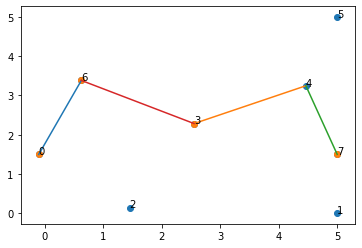

In [161]:
plt.scatter(xn,yn);
for i in range(n):
    plt.annotate(i, (xn[i], yn[i]))
    
for k,v in xn_vars.items():
    if v.varValue > 0.5:
        i,j = list(map(int,k.split("_")[1:]))
        plt.plot([xn[i],xn[j]], [yn[i],yn[j]])
xx = []
yy = []
for k,v in yn_vars.items():
    if v.varValue > 0.5:
        i,a = list(map(int,k.split("_")[1:]))
        xx.append(xn[i])
        yy.append(yn[i])
plt.scatter(xx,yy);